In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

In [3]:
data = pd.read_csv(".\Data\MPG\mpg.csv")

# Exploring the data

In [9]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
data.shape

(398, 9)

In [11]:
data.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


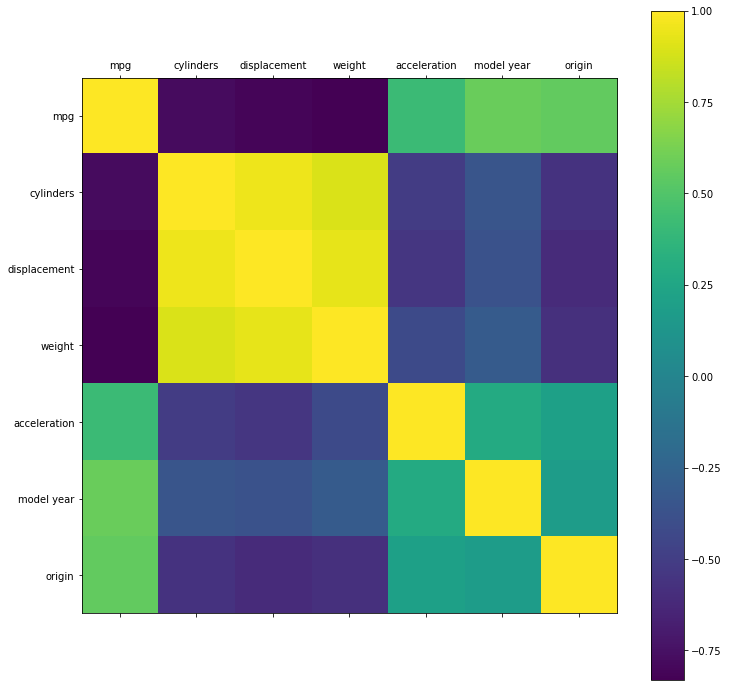

In [53]:
plt.figure(figsize=(12,12))
plt.matshow(data.corr(), fignum=1)
plt.xticks(range(len(data.corr().columns)), data.corr().columns)
plt.yticks(range(len(data.corr().columns)), data.corr().columns)
plt.colorbar()
plt.show()

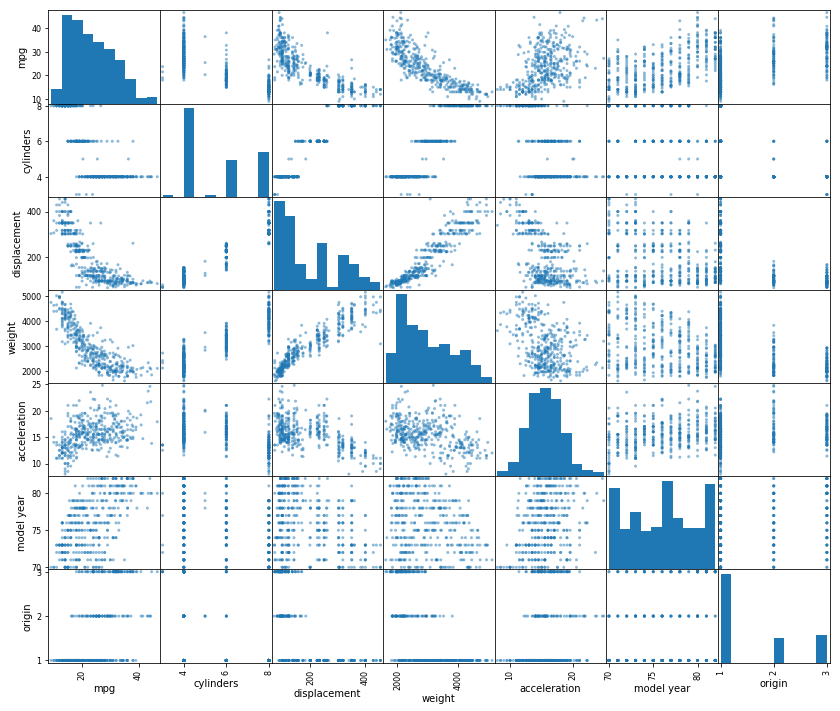

In [55]:
pd.plotting.scatter_matrix(data, figsize=(14, 12))
plt.show()

# Fitting linear regression model for weight
## First, see the average line, to calculate the total sum of squared errors.

SST 24252.575477386938


<Figure size 432x288 with 0 Axes>

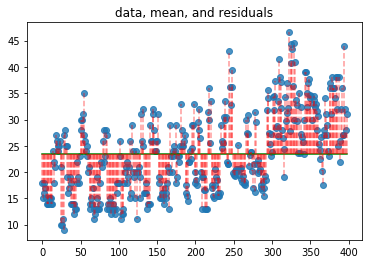

In [4]:
################## Part 1 ##################
A = np.array(data.mpg[:])
W = np.array(data.weight[:])
x = np.arange(0, len(A))

# mean line
A_mean_line = np.repeat(A.mean(), len(A))

# Residuals
resid = A-A_mean_line
resid_sq = resid**2

# Sum of Squared Errors
SST = resid_sq.sum()
print("SST", SST)
# The goal is to minimize the SSE

# Plotting
plt.figure(1)
fig, ax = plt.subplots()
ax.set_title('data, mean, and residuals')
# Plot points
plt.plot(A, 'o', alpha=0.8)
# Plot mean line
plt.plot(A_mean_line, 'g-')
# Plot residuals
plt.plot([x,x], [A_mean_line, A], 'r--', alpha=0.4)
plt.show()

## Determining the parameter of the linear regression for weight by hand
Using only 1 degree.

B1: -0.007676610063926469
B0: 46.31736442026564
SSR 7474.814014382101
Coefficient of determination: 0.6917929800341575
Error: 0.30820701996584254


<Figure size 432x288 with 0 Axes>

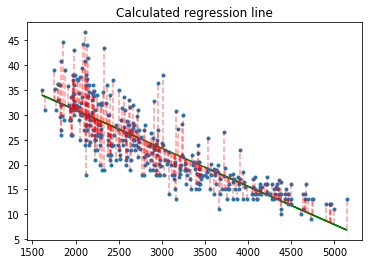

<Figure size 432x288 with 0 Axes>

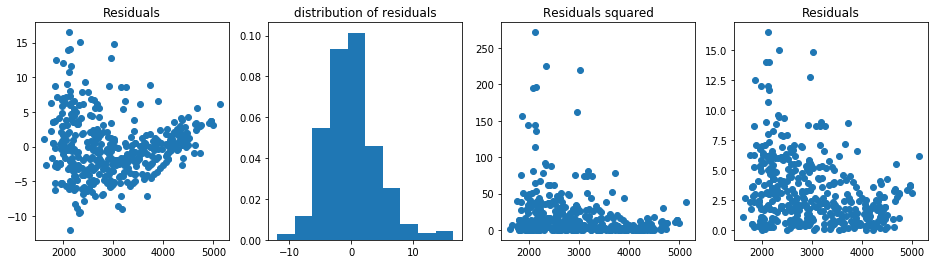

In [5]:
################## Part 2 ##################

# Slope aka B1
slope = np.sum((W - np.average(W)) * (A - np.average(A)))/np.sum( (W - np.average(W))**2 )
print("B1:", slope)
# Centroid
centroid_x = np.average(W)
centroid_y = np.average(A)
# B0
y_intercept = centroid_y - slope*centroid_x
print("B0:", y_intercept)

# Regression line
regression_line = y_intercept + slope*W
# residuals
resid = A - regression_line
# SSE
SSR = (resid**2).sum()
print("SSR", SSR)

detCoef = (SST-SSR)/SST
print("Coefficient of determination:", detCoef)
print("Error:", 1-detCoef)

# Plotting
plt.figure(5)
fig, ax = plt.subplots()
ax.set_title('Calculated regression line')
plt.plot(W, regression_line, 'g-')
plt.plot(W, A, '.')
plt.plot([W,W], [regression_line, A], 'r--', alpha=0.4)
plt.show()

# Residuals
plt.figure(6)
plt.subplots(figsize=(16,4))

ax = plt.subplot(1,4,1)
ax.set_title("Residuals")
plt.plot(W, resid, 'o')

ax = plt.subplot(1,4,2)
ax.set_title("distribution of residuals")
plt.hist(resid, density=True, cumulative=False)

ax = plt.subplot(1,4,3)
ax.set_title("Residuals squared")
plt.plot(W, resid**2, 'o')

ax = plt.subplot(1,4,4)
ax.set_title("Residuals")
plt.plot(W, np.sqrt(resid**2), 'o')
plt.show()

# Fitting linear regression model with 2 degrees for weight, displacement, cylinders, and model year

SSE weight (deg=2) 6917.122505422431
Standard deviation of error (weight): 4.168897310739801


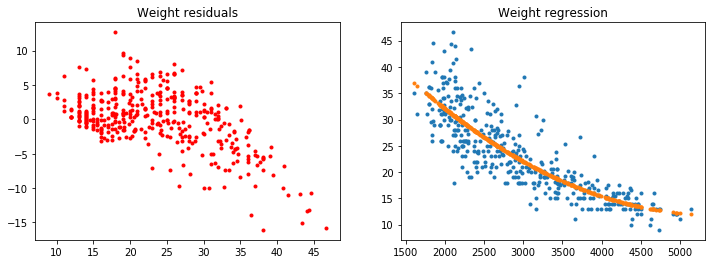

In [8]:
# Data
mpg = np.array(data.mpg[:])
weight = np.array(data.weight[:])
displacement = np.array(data.displacement[:])
cylinders = np.array(data.cylinders[:])
modelYear = np.array(data.iloc[:,6])
x = np.arange(0, len(mpg))

##################### Weight

pfit = np.polyfit(weight, mpg, 2)
b2_w = pfit[0]
b1_w = pfit[1]
b0_w = pfit[2]

y_w = b0_w + b1_w*weight + b2_w*(weight**2)

SSE_w = np.sum((mpg-y_w)**2)
print("SSE weight (deg=2)", SSE_w)
sd_w = np.std(y_w-mpg)
print("Standard deviation of error (weight):", sd_w)

fig, ax = plt.subplots(figsize=(12,4))
ax = plt.subplot(1,2,1)
ax.set_title("Weight residuals")
ax.plot(mpg, y_w-mpg, 'r.')

ax = plt.subplot(1,2,2)
ax.set_title("Weight regression")
ax.plot(weight, mpg, '.', alpha=1)
ax.plot(weight, y_w, '.')
plt.show()

displacement parameters: 42.20890809268664 -0.1394425013554036 0.0001715233855627656
SSE displacement (deg=2) 7556.968867380422
Standard deviation of error (displacement): 4.357448675918902


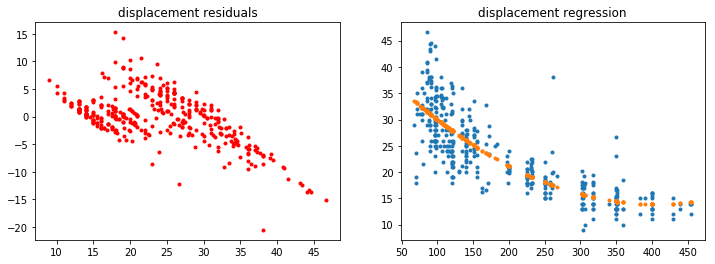

In [25]:
##################### displacement

pfit = np.polyfit(displacement, mpg, 2)
b2_d = pfit[0]
b1_d = pfit[1]
b0_d = pfit[2]

print("displacement parameters:", b0_d, b1_d, b2_d)
y_d = b0_d + b1_d*displacement + b2_d*(displacement**2)

SSE_d = np.sum((mpg-y_d)**2)
print("SSE displacement (deg=2)", SSE_d)
sd_d = np.std(y_d-mpg)
print("Standard deviation of error (displacement):", sd_d)

fig, ax = plt.subplots(figsize=(12,4))
ax = plt.subplot(1,2,1)
ax.set_title("displacement residuals")
ax.plot(mpg, y_d-mpg, 'r.')

ax = plt.subplot(1,2,2)
ax.set_title("displacement regression")
ax.plot(displacement, mpg, '.', alpha=1)
ax.plot(displacement, y_d, '.')
plt.show()

SSE cylinders (deg=2) 9604.03184710849
Standard deviation of error (cylinders): 4.912304274390196


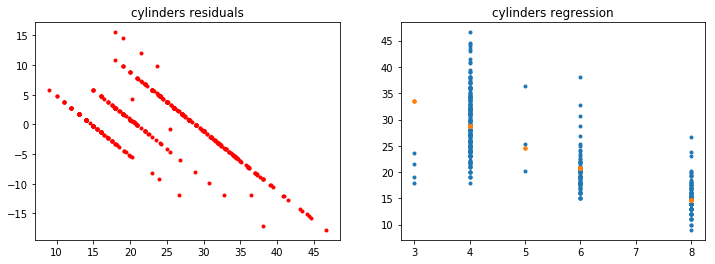

In [17]:
##################### cylinders

pfit = np.polyfit(cylinders, mpg, 2)
b2_c = pfit[0]
b1_c = pfit[1]
b0_c = pfit[2]

y_c = b0_c + b1_c*cylinders + b2_c*(cylinders**2)

SSE_c = np.sum((mpg-y_c)**2)
print("SSE cylinders (deg=2)", SSE_c)
sd_c = np.std(y_c-mpg)
print("Standard deviation of error (cylinders):", sd_c)

fig, ax = plt.subplots(figsize=(12,4))
ax = plt.subplot(1,2,1)
ax.set_title("cylinders residuals")
ax.plot(mpg, y_c-mpg, 'r.')

ax = plt.subplot(1,2,2)
ax.set_title("cylinders regression")
ax.plot(cylinders, mpg, '.', alpha=1)
ax.plot(cylinders, y_c, '.')
plt.show()

SSE modelYear (deg=2) 15401.12777660082
Standard deviation of error (modelYear): 6.2206350918723095


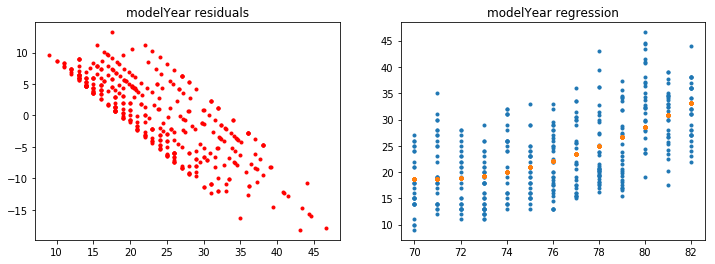

In [16]:
##################### model year

pfit = np.polyfit(modelYear, mpg, 2)
b2_m = pfit[0]
b1_m = pfit[1]
b0_m = pfit[2]

y_m = b0_m + b1_m*modelYear + b2_m*(modelYear**2)

SSE_m = np.sum((mpg-y_m)**2)
print("SSE modelYear (deg=2)", SSE_m)
sd_m = np.std(y_m-mpg)
print("Standard deviation of error (modelYear):", sd_m)

fig, ax = plt.subplots(figsize=(12,4))
ax = plt.subplot(1,2,1)
ax.set_title("modelYear residuals")
ax.plot(mpg, y_m-mpg, 'r.')

ax = plt.subplot(1,2,2)
ax.set_title("modelYear regression")
ax.plot(modelYear, mpg, '.', alpha=1)
ax.plot(modelYear, y_m, '.')
plt.show()

In [15]:
##################### predict one value
w = 2500
d = 150
c = 4

y_w = b0_w + b1_w*w + b2_w*(w**2)
y_d = b0_d + b1_d*d + b2_d*(d**2)
y_c = b0_c + b1_c*c + b2_c*(c**2)

y_p = (sd_w/(sd_w+sd_d+sd_c))*y_w + (sd_d/(sd_w+sd_d+sd_c))*y_d + (sd_c/(sd_w+sd_d+sd_c))*y_c

print("Predicted values for each:")
print(y_w, y_d, y_c)
print("Weighted predicted value, combined", y_p)

Predicted values for each:
26.639133912221748 25.151809064538327 28.824487674415227
Weighted predicted value, combined 26.955697023564024


In [20]:
##################### predict functions
def predict(w, d, c):
    
    y_w = b0_w + b1_w*w + b2_w*(w**2)
    y_d = b0_d + b1_d*d + b2_d*(d**2)
    y_c = b0_c + b1_c*c + b2_c*(c**2)
    
    y_p = (sd_w/(sd_w+sd_d+sd_c))*y_w + (sd_d/(sd_w+sd_d+sd_c))*y_d + (sd_c/(sd_w+sd_d+sd_c))*y_c
    #y_p = (SSE_w/(SSE_w+SSE_d+SSE_c))*y_w + (SSE_d/(SSE_w+SSE_d+SSE_c))*y_d + (SSE_c/(SSE_w+SSE_d+SSE_c))*y_c
    
    return y_p

def predict2(w, m):
    
    y_w = b0_w + b1_w*w + b2_w*(w**2)
    y_m = b0_m + b1_m*m + b2_m*(m**2)
    
    y_p = ( (sd_w/(sd_w+sd_m))*y_w + (sd_m/(sd_w+sd_m))*y_m )
    
    return y_p

SSE prediction 7447.6687455716765
Standard deviation of error (prediction): 4.325821949830734


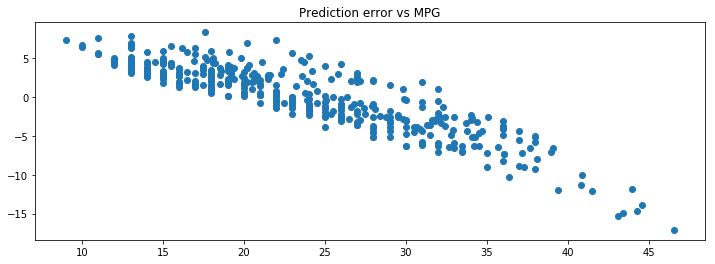

In [21]:
##################### predict all 
#y_p = predict(weight, displacement, cylinders)
y_p = predict2(weight, modelYear)

SSE_p = np.sum((mpg-y_p)**2)
print("SSE prediction", SSE_p)
sd_p = np.std(y_p-mpg)
print("Standard deviation of error (prediction):", sd_p)

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title("Prediction error vs MPG")
num = len(mpg)
ax.plot(mpg[:num], y_p[:num]-mpg[:num], 'o')
plt.show()